# Logistic Regression

With help from: https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
#iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_target = pd.DataFrame(data = (iris.target != 0) * 1, columns = ["Target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)
iris_df.head(10)

Sepal Length (cm)  Sepal Width (cm)  Target
0                5.1               3.5       0
1                4.9               3.0       0
2                4.7               3.2       0
3                4.6               3.1       0
4                5.0               3.6       0
5                5.4               3.9       0
6                4.6               3.4       0
7                5.0               3.4       0
8                4.4               2.9       0
9                4.9               3.1       0

In [5]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1
lr = 0.001
num_iter = 100000

In [7]:
Image(filename='./images/iris.png', width=500) 


NameError: name 'Image' is not defined

In [22]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [23]:
X = add_intercept(X)

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

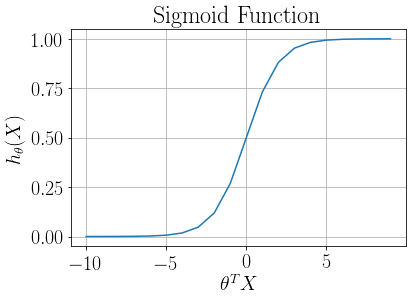

In [9]:
# Graphically, the sigmoid function looks like so:
a = np.arange(-10.0, 10.0)
b = sigmoid(a)

#fig, ax = plt.subplots(figsize=(12,8))  
#ax.plot(nums, sigmoid(nums), 'r')
plt.plot(a,b)

## Config LaTex text rendering in legend
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)

## Config the graph
plt.title('Sigmoid Function')
plt.xlabel(r'$\theta^T X$')
plt.ylabel(r'$h_{\theta}(X)$')
plt.grid(True)
plt.figure(figsize=(13,7))

# Show the graph
#plt.show()



$$\text{Sigmoid Function = }\frac{1}{1+e^{-z}}$$

In [25]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

/Users/collinprather/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


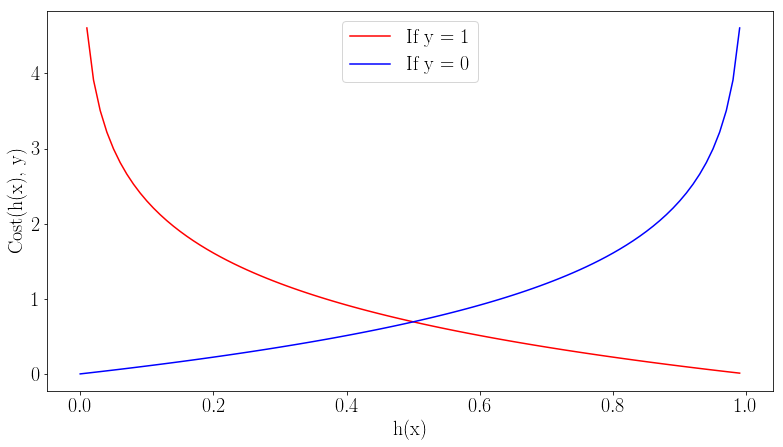

In [11]:
# Graphically, the Cost function looks like so:
nums = np.arange(0, 1, step=.01)

fig, ax = plt.subplots(figsize=(13,7))


ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')
ax.plot(nums, np.multiply(1, -np.log(1-nums)), c='b', label='If y = 0')
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')

When y=1,
$$\text{as } h_{\theta}(x)\to1,\ \text{Cost}(h_{\theta}(x), y)\to0$$
$$\text{as } h_{\theta}(x)\to0,\ \text{Cost}(h_{\theta}(x), y)\to\infty$$

When y=0,
$$\text{as }\ h_{\theta}(x)\to1,\ \text{Cost}(h_{\theta}(x), y)\to\infty$$
$$\text{as }\ h_{\theta}(x)\to0,\ \text{Cost}(h_{\theta}(x), y)\to0$$

In [26]:
def gradient_descent(X, y):   
    # weights initialization
    theta = np.zeros(X.shape[1])
    descent = dict()
        
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(z)
        loss = cost(h, y)
                
        if i % 10000 == 0:
            # Add something here to capture the 10 costs so that I can plot it against # of iterations
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return descent

$$\theta_1=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x^{(i)}_1$$
$$\theta_2=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x^{(i)}_2$$
$$\vdots$$
$$\theta_n=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x^{(i)}_n$$

In [27]:
descent_dict = gradient_descent(X,y)

cost: 0.6914086418407188 	 weights: [ 0.00016667  0.001253    0.00038767] 	
cost: 0.31914025762495013 	 weights: [-0.17879363  0.92748847 -1.41245393] 	
cost: 0.22076282591769877 	 weights: [-0.30426112  1.41734044 -2.25678014] 	
cost: 0.17370626624345922 	 weights: [-0.39934073  1.76068124 -2.8399315 ] 	
cost: 0.14607836499121452 	 weights: [-0.47784802  2.02552234 -3.28576137] 	
cost: 0.1278095149727622 	 weights: [-0.54588701  2.24177966 -3.64739264] 	
cost: 0.11477019334946933 	 weights: [-0.60668512  2.42501711 -3.95213189] 	
cost: 0.10495731501075146 	 weights: [-0.66215819  2.58432901 -4.21581886] 	
cost: 0.09728061175028055 	 weights: [-0.71353854  2.7254851  -4.44845219] 	
cost: 0.0910948324402139 	 weights: [-0.76166695  2.85237561 -4.65674792] 	


Text(0,0.5,'Cost')

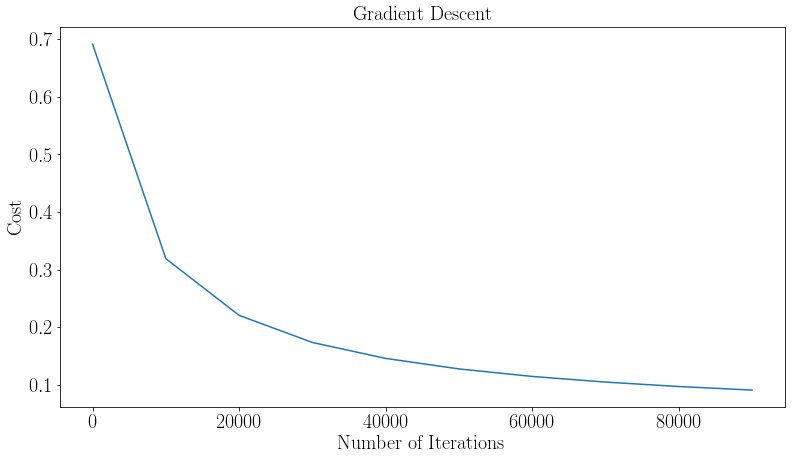

In [14]:
# Setting up variables
iterations = descent_dict.keys()
current_cost = descent_dict.values()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'size': 20,
        }

fig, ax = plt.subplots(figsize=(13,7))  
ax.plot(iterations, current_cost)
ax.set_title('Gradient Descent', fontdict=font)
ax.set_xlabel('Number of Iterations', fontdict=font)
ax.set_ylabel('Cost', fontdict=font)



In [28]:
# Just copy and pasted it from above
final_weights = np.array([-0.76166695, 2.85237561, -4.65674792])

In [29]:
def predict_prob(X, theta):
    final_pred = sigmoid(np.dot(X, theta))
    return final_pred.round()

In [30]:
predictions = predict_prob(X, final_weights)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = sum(correct) / len(correct) 
print('accuracy = {:0.2f}%'.format(accuracy*100))

accuracy = 99.33%
